In [1]:
# Imports e preâmbulos
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils #pip install imutils
import os

%matplotlib inline

print("Versão da OpenCV ", cv2.__version__)
print("Estamos no diretório ", os.getcwd())
print("Listagem: ", os.listdir())

Versão da OpenCV  4.2.0
Estamos no diretório  /Users/mirwox/Dropbox/Insper/2016/Robotics/src/bot19/calibracao
Listagem:  ['padrao_perto_parede_02.png', 'padrao_perto_parede.png', 'padrao_chao_meio_sala.png', 'visaorobo_puxa_vermelho.mp4', 'Calibracao.ipynb', 'padrao_estante.png', '.ipynb_checkpoints', 'padrao_gabarito.png']


In [2]:

# Função auxiliar para plot

def multiplot(imgs, legenda):
    """ Função """
    fig, axes = plt.subplots(1,len(imgs), figsize=(24,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB))
        return
    for i in range(len(imgs)):
        axes[i].imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))

def multiplot_gray(imgs, legenda):
    """ Função que plota n imagens grayscale em linha"""
    fig, axes = plt.subplots(1,len(imgs), figsize=(26,8))    
    fig.suptitle(legenda)
    if len(imgs)==1: # Peculiaridade do subplot. Não é relevante para a questão
        ax = axes
        ax.imshow(cv2.cvtColor(imgs[0],  vmin=0, vmax=255, cmap="Greys_r"))
        return
    for i in range(len(imgs)):
        axes[i].imshow(imgs[i], vmin=0, vmax=255, cmap="Greys_r")

<img src="./padrao_gabarito.png" width=33%>

In [3]:
padroes = "padrao_chao_meio_sala.png  padrao_perto_parede.png padrao_estante.png         padrao_perto_parede_02.png".split()

In [4]:
bgr = [cv2.imread(p) for p in padroes]

In [5]:
hsvs = [cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in bgr]

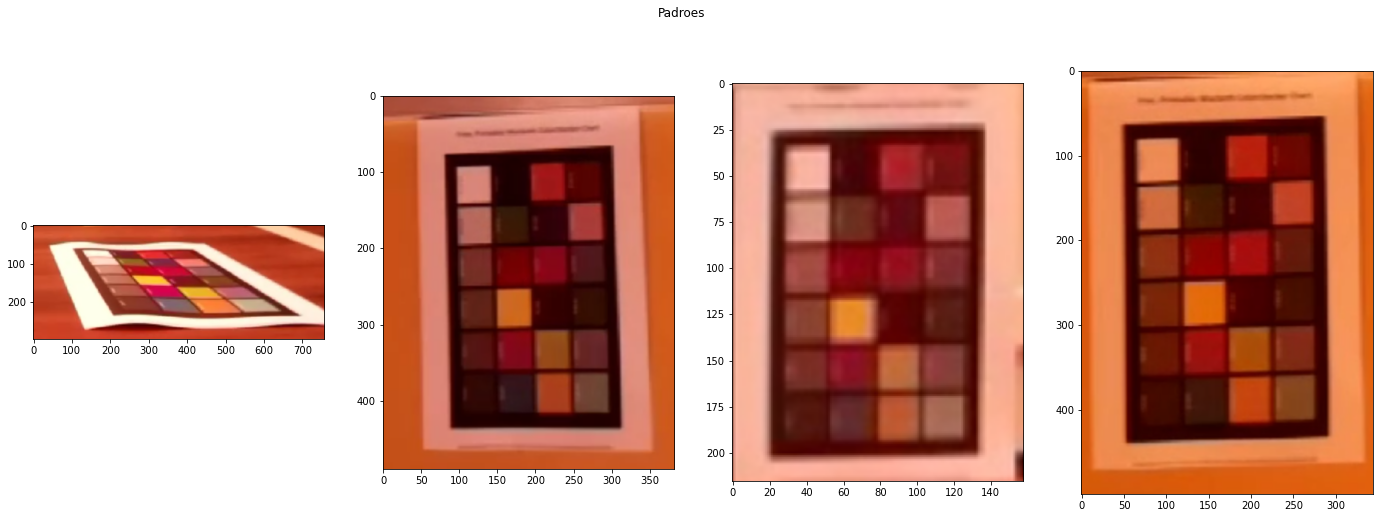

In [6]:
multiplot(bgr, "Padroes")

In [21]:
menor = [0, 0, 0 ]
maior = [180, 255, 150]

def filter(HSV, menor, maior):
    cor1 = np.array(menor, dtype=np.uint8)
    cor2 = np.array(maior, dtype=np.uint8)
    return cv2.inRange(HSV, cor1, cor2)

In [22]:
black = [filter(h, menor, maior) for h in hsvs]

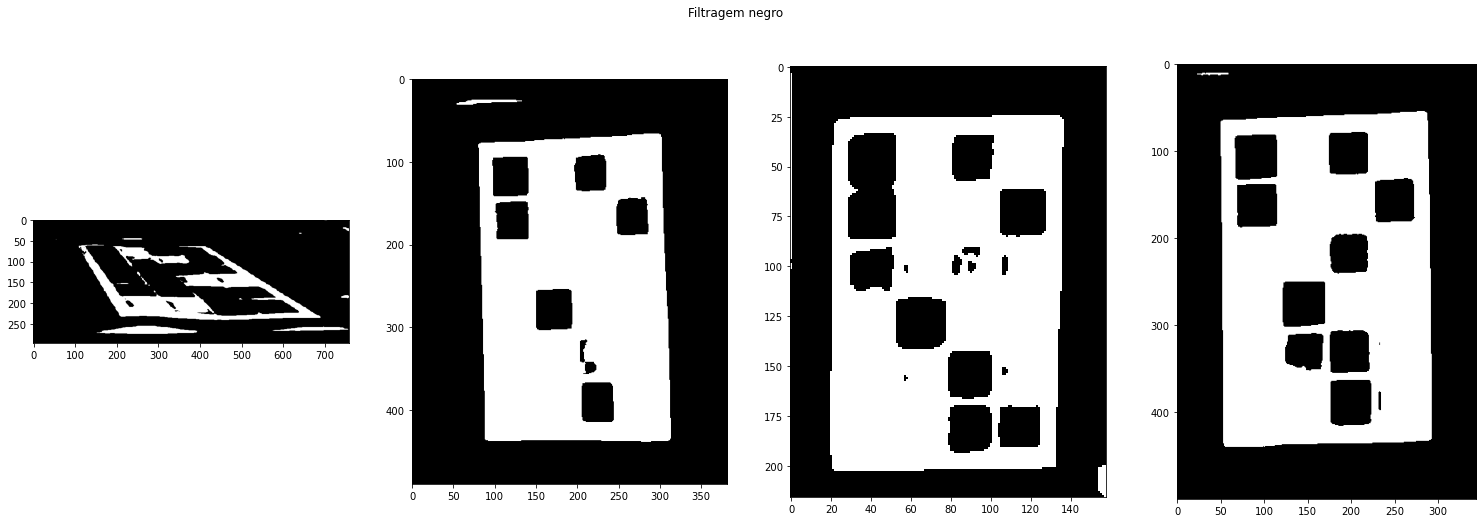

In [23]:
multiplot_gray(black, "Filtragem negro")

In [10]:
grays = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in bgr]

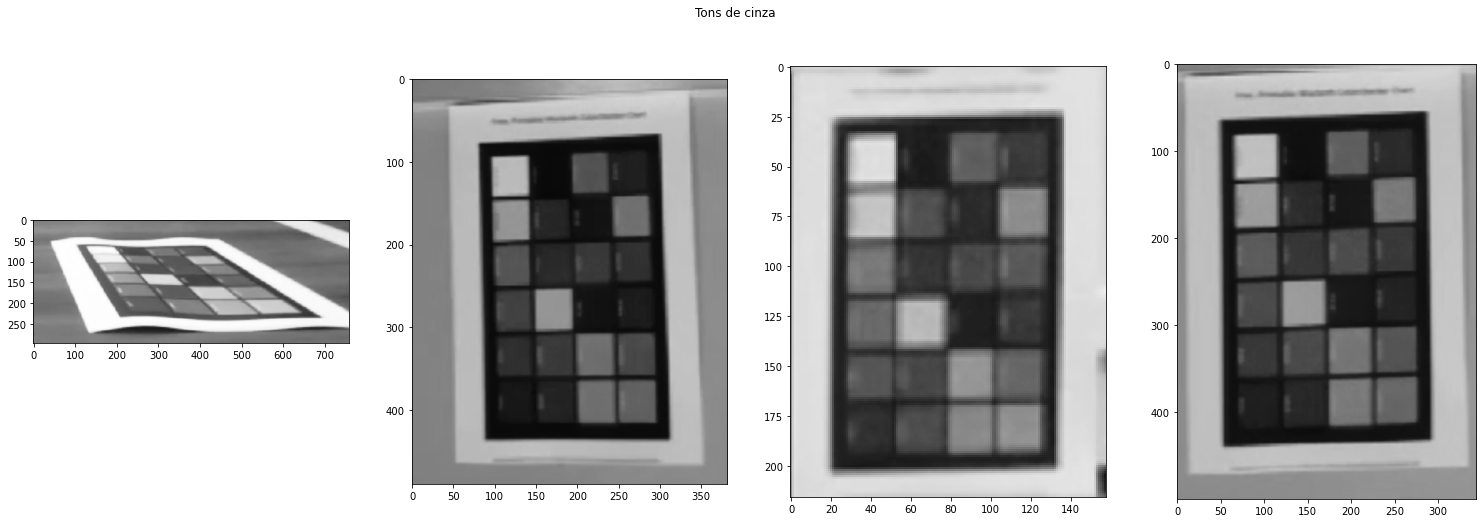

In [11]:
multiplot_gray(grays, "Tons de cinza")

In [12]:
tup = [cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) for img in grays]
tup2 = [cv2.threshold(img,0,255,cv2.THRESH_OTSU) for img in grays]

In [13]:
thresh = [img[1] for img in tup]
thresh2 = [img[1] for img in tup2]

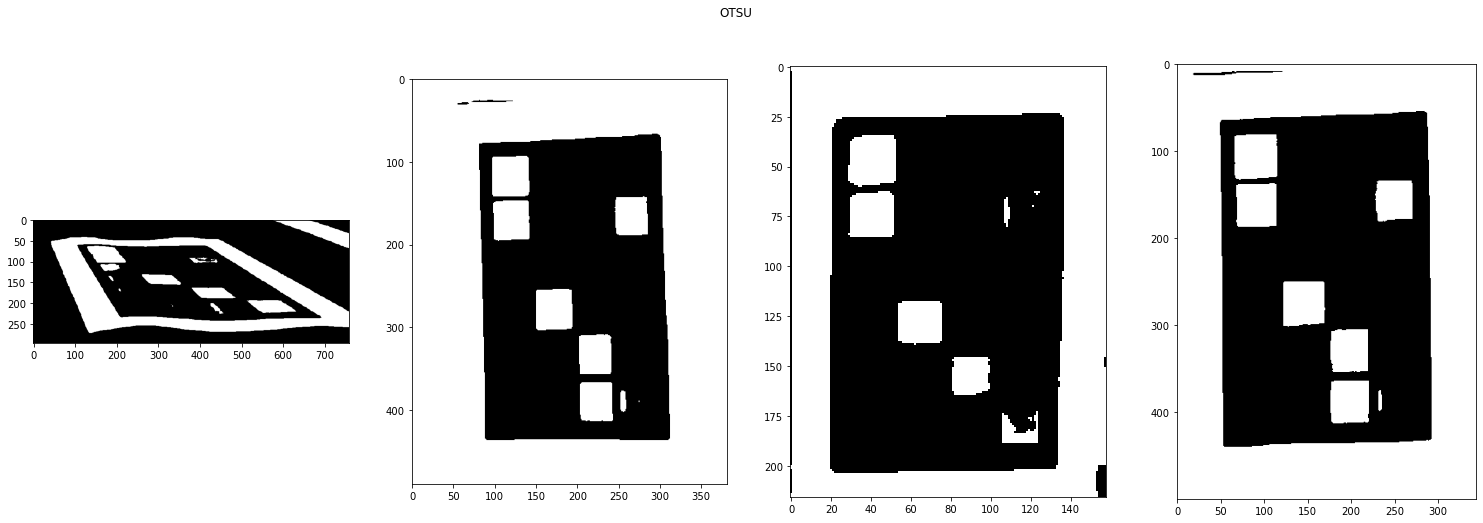

In [14]:
multiplot_gray(thresh, "OTSU")

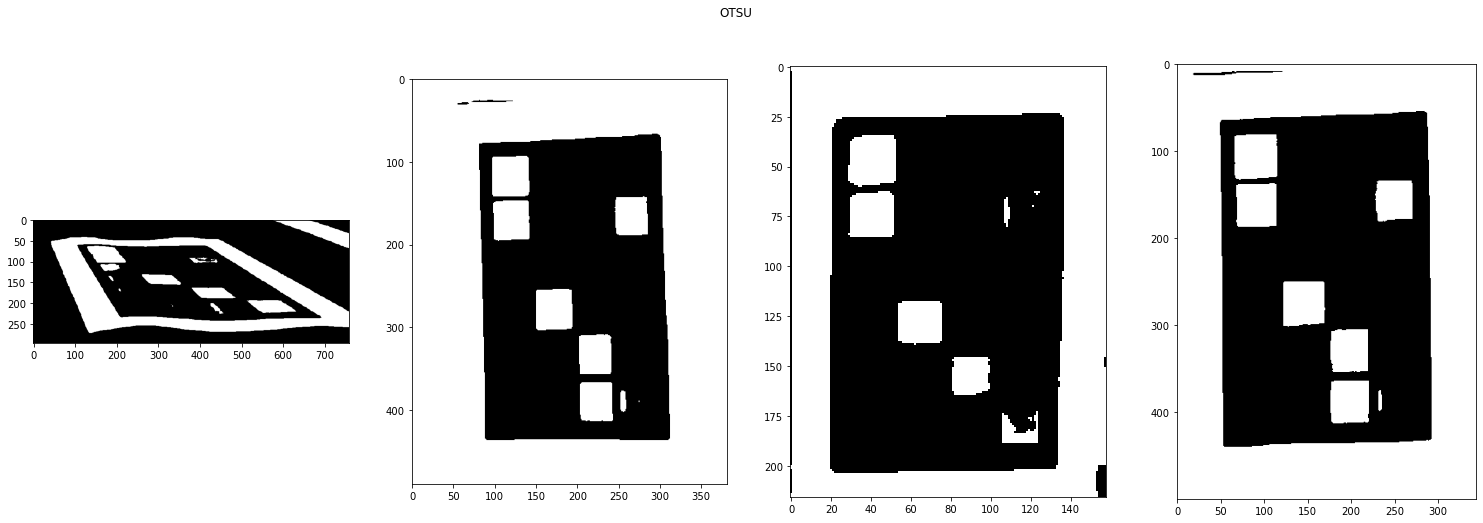

In [15]:
multiplot_gray(thresh2, "OTSU")

In [16]:
!open .

Coisas a investigar:

https://github.com/spmallick/learnopencv/blob/master/BlobDetector/blob.py
